# 0. 데이터 임포트

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

df = pd.read_csv('../data/final_merge_data.csv')
df.columns

Index(['id_student', 'code_module', 'highest_education', 'studied_credits',
       'imd_band', 'final_result', 'id_assessment', 'score', 'sum_click',
       'mean_click', 'log_sum_click', 'log_mean_click', 'log_studied_credits',
       'scaled_studied_credits', 'scaled_score'],
      dtype='object')

In [36]:
import warnings
import lightgbm as lgb
from sklearn.exceptions import DataConversionWarning

# sklearn DataConversionWarning 무시
warnings.filterwarnings("ignore", category=DataConversionWarning)

# LightGBM Warning 무시
warnings.filterwarnings("ignore", category=UserWarning)

# LightGBM 모델 생성 시 verbose 파라미터 설정
lgb_model = lgb.LGBMClassifier(verbose=-1)  # -1: 모든 메시지 끄기

In [37]:
# 데이터 준비 (final_merged_data에서 학습에 필요한 컬럼을 선택하여 X, y로 분리)
X = df.drop(['id_student', 'code_module', 'id_assessment', 'final_result'], axis=1)  # id_student, final_result 제외한 변수들
y = df['final_result']  # 이탈 여부 (final_result)

# 학습용, 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
# 'code_module', 'highest_education', 'studied_credits', 'imd_band', 'score', 'sum_click', 'mean_click', 'log_sum_click', 'log_mean_click', 'log_studied_credits', 'scaled_studied_credits', 'scaled_score'

# 1. XGBoost

In [39]:
# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 정확도 확인
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost 모델 정확도: {xgb_accuracy * 100:.2f}%')

XGBoost 모델 정확도: 88.23%


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 예시: y_test는 실제 값, y_pred는 모델의 예측 값
# y_test = 실제값 (정답 레이블)
# y_pred = 예측값 (모델의 출력)

# 정확도(Accuracy) 계산
accuracy = accuracy_score(y_test, y_pred_xgb)

# 정밀도(Precision) 계산
precision = precision_score(y_test, y_pred_xgb)

# 재현율(Recall) 계산
recall = recall_score(y_test, y_pred_xgb)

# F1 Score 계산
f1 = f1_score(y_test, y_pred_xgb)

# 결과 출력
print(f"정확도(Accuracy): {accuracy:.2f}")
print(f"정밀도(Precision): {precision:.2f}")
print(f"재현율(Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


정확도(Accuracy): 0.88
정밀도(Precision): 0.88
재현율(Recall): 0.99
F1 Score: 0.94


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 예시 데이터 생성 (여기서는 200000개 샘플을 생성)
X = np.random.rand(200000, 12)
y = np.random.randint(0, 2, 200000)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 초기 파라미터 설정
params = {
    'objective': 'binary:logistic',  # 이진 분류
    'eval_metric': 'logloss',        # 평가 지표: 로그 손실
    'early_stopping_rounds': 10,     # 성능 향상이 없을 때 학습을 조기 종료
}

# xgb.cv를 사용하여 교차 검증
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,  # 최대 부스팅 라운드 수
    nfold=3,              # 3폴드 교차 검증
    metrics='logloss',    # 성능 지표: 로그 손실
    as_pandas=True,       # pandas DataFrame 형식으로 결과 출력
    seed=42               # 랜덤 시드 고정
)

# 교차 검증 결과 확인
print("최적의 학습 횟수: ", cv_results['test-logloss-mean'].idxmin())  # 가장 낮은 logloss 값의 인덱스

# 최적 부스팅 라운드 수 추출
best_num_boost_round = cv_results['test-logloss-mean'].idxmin()
print(f"최적 부스팅 라운드 수: {best_num_boost_round}")

# 최적 모델 학습
final_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_round
)

# 예측
y_pred = final_model.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)  # 이진 분류로 변환

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"모델 정확도: {accuracy * 100:.2f}%")


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stopping_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


최적의 학습 횟수:  0
최적 부스팅 라운드 수: 0
모델 정확도: 50.08%


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stopping_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


# 2. DecisionTree

In [41]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTree 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# 모델 학습
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 정확도 확인
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'의사결정나무 모델 정확도: {dt_accuracy * 100:.2f}%')


의사결정나무 모델 정확도: 88.90%


In [ ]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Decision Tree 모델 초기화
dt = DecisionTreeClassifier(random_state=42)

# 튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 10, None],              # 
    'min_samples_split': [2, 5, 10],            # 
    'min_samples_leaf': [1, 2, 4],              # 
    'max_features': [None, 'sqrt', 'log2'],     # 
}

# GridSearchCV로 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 확인
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19848\4206659533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


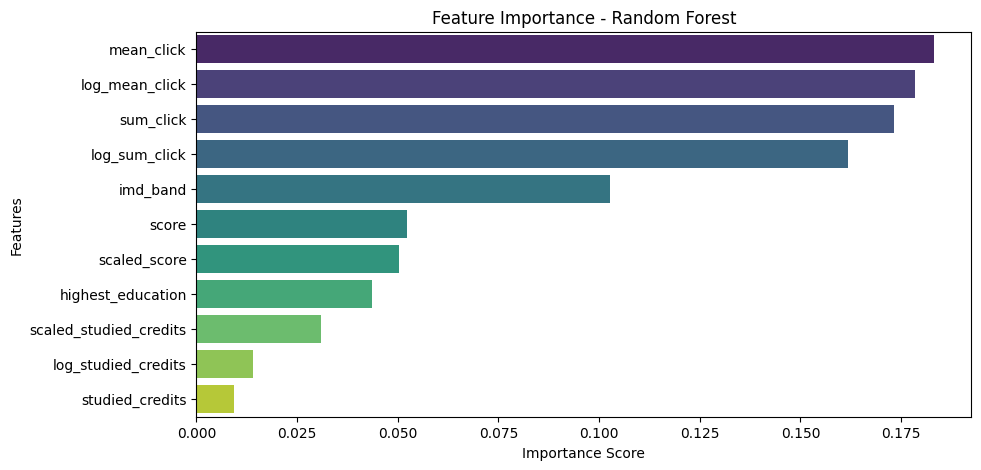

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_dt.feature_importances_, index=df.drop(columns=['id_student', 'code_module', 'id_assessment', 'final_result']).columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
dt_param_grid = {
    'max_depth': [7, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# DecisionTree 모델 초기화
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV를 이용한 하이퍼파라미터 튜닝
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, 
                              scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# 모델 학습
grid_search_dt.fit(X_train, y_train)

# 최적 파라미터 확인
print("최적 하이퍼파라미터: ", grid_search_dt.best_params_)

# 최적 모델로 예측
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# 정확도 확인
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'최적화된 의사결정나무 모델 정확도: {dt_accuracy * 100:.2f}%')


Fitting 3 folds for each of 24 candidates, totalling 72 fits
최적 하이퍼파라미터:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
최적화된 의사결정나무 모델 정확도: 89.29%


C:\Users\Playdata\AppData\Local\Temp\ipykernel_232\935701874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


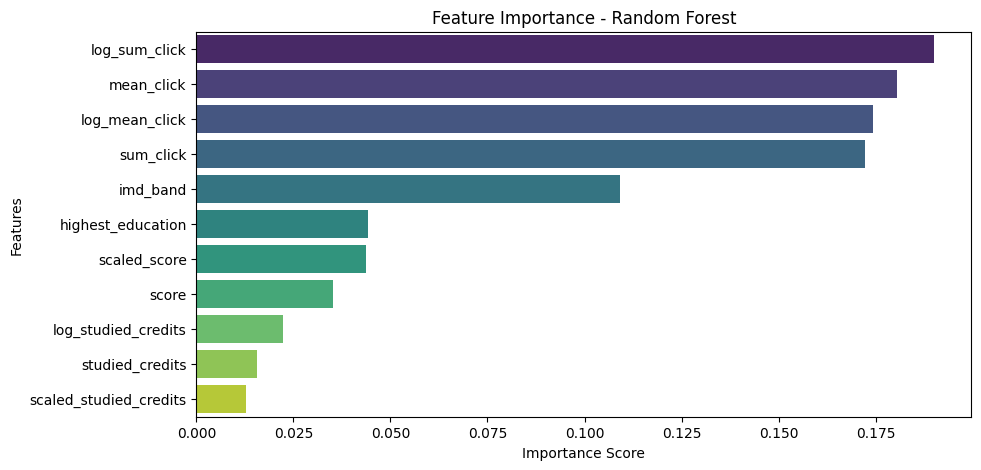

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report
from scipy.stats import randint


# 5. 기본 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)  # ✅ 기본 설정 유지
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 6. 성능 평가 (기본 모델)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
r2 = r2_score(y_test, y_pred)  # ✅ r2_score 추가

print(f"\n=== 기본 Random Forest 성능 ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"R2 Score: {r2:.4f}")  # ✅ r2_score 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



=== 기본 Random Forest 성능 ===
Accuracy: 0.8990
F1 Score: 0.8934
R2 Score: 0.1241

Confusion Matrix:
[[ 2492  2428]
 [ 1308 30756]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.57      4920
           1       0.93      0.96      0.94     32064

    accuracy                           0.90     36984
   macro avg       0.79      0.73      0.76     36984
weighted avg       0.89      0.90      0.89     36984



In [ ]:

# 7. 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
param_dist = {
    'n_estimators': randint(100, 200),  # ✅ n_estimators 범위를 100~200으로 조정
    'max_depth': [10, 20, None],  # ✅ 깊이를 최적화하여 과적합 방지
    'min_samples_split': [2, 5, 10],  # ✅ 탐색 범위 유지
    'min_samples_leaf': [1, 2, 4],  # ✅ 탐색 범위 유지
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                    param_distributions=param_dist,
                                    n_iter=10,  # ✅ 10개의 랜덤 샘플링
                                    cv=5,  # ✅ 5-Fold Cross Validation
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    random_state=42)
random_search.fit(X_train_scaled, y_train)

# 8. 최적의 하이퍼파라미터 및 성능 확인
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("\n=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===")
print(f"Best Parameters: {best_params}")

# 9. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
#r2_best = r2_score(y_test, y_pred_best)  # ✅ r2_score 추가

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
#print(f"Best R2 Score: {r2_best:.4f}")  # ✅ r2_score 출력

# 10. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
plt.title("Confusion Matrix - Random Forest (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Feature Importance 시각화
feature_importances = pd.Series(best_model.feature_importances_, index=df.drop(columns=['final_result']).columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


---

# 3. Light GBM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix


In [ ]:
# LightGBM 모델 생성
lgbm = lgb.LGBMClassifier(random_state=42, device="gpu")  # GPU 사용 가능하면 활성화

# 기본 모델 학습 (확인용)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(f'Initial Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Initial ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

# 하이퍼파라미터 범위 최적화 (범위 축소)
param_dist = {
    'num_leaves': [20, 40, 60],  # 기존보다 줄임
    'learning_rate': [0.1, 0.2],  # 너무 낮은 값 제외
    'n_estimators': [100, 200],  # 500개 → 200개로 축소
    'max_depth': [5, 10],  # 너무 깊은 트리는 제거
    'min_data_in_leaf': [20, 40],  
    'feature_fraction': [0.7, 0.9],  
}
# 'num_leaves': 40, 'n_estimators': 200, 'min_data_in_leaf': 40, 'max_depth': 10, 'learning_rate': 0.2, 'feature_fraction': 0.9}


# RandomizedSearchCV 적용 (탐색 횟수 30번, 병렬처리 활성화)
random_search = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_dist, 
    n_iter=30,  # 탐색 횟수 감소
    cv=3,  # 3-Fold 교차검증
    scoring='roc_auc', 
    n_jobs=-1,  # 병렬 처리
    verbose=2,
    random_state=42
)

# 최적화 실행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'Best parameters found: {random_search.best_params_}')
print(f'Best AUC Score: {random_search.best_score_}')

# 최적 모델로 최종 평가
best_lgbm = random_search.best_estimator_
y_pred_final = best_lgbm.predict(X_test)
print(f'Final Accuracy: {accuracy_score(y_test, y_pred_final)}')
print(f'Final ROC AUC Score: {roc_auc_score(y_test, y_pred_final)}')

[LightGBM] [Info] Number of positive: 128254, number of negative: 19678
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 147932, number of used features: 11
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 11 dense feature groups (1.69 MB) transferred to GPU in 0.003345 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.866979 -> initscore=1.874511
[LightGBM] [Info] Start training from score 1.874511
Initial Accuracy: 0.8716742375081116
Initial ROC AUC Score: 0.5196616675186213
Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
11 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\lightgbm\sklearn.py", line 1284, in fit
    super().fit(
  File "c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\lightgbm\sklear

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 128254, number of negative: 19678
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 147932, number of used features: 11
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [In

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 예시: y_test는 실제 값, y_pred는 모델의 예측 값
# y_test = 실제값 (정답 레이블)
# y_pred = 예측값 (모델의 출력)

# 정확도(Accuracy) 계산
accuracy = accuracy_score(y_test, y_pred_final)

# 정밀도(Precision) 계산
precision = precision_score(y_test, y_pred_final)

# 재현율(Recall) 계산
recall = recall_score(y_test, y_pred_final)

# F1 Score 계산
f1 = f1_score(y_test, y_pred_final)

# 결과 출력
print(f"정확도(Accuracy): {accuracy:.2f}")
print(f"정밀도(Precision): {precision:.2f}")
print(f"재현율(Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


정확도(Accuracy): 0.89
정밀도(Precision): 0.89
재현율(Recall): 0.99
F1 Score: 0.94


In [ ]:
# 필요한 라이브러리 임포트
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# LightGBM 모델 생성
lgbm = lgb.LGBMClassifier(random_state=42)

# 모델 학습
lgbm.fit(X_train, y_train)

# 예측
y_pred = lgbm.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'min_data_in_leaf': [20, 30],
    'feature_fraction': [0.6, 0.8],
}

# GridSearchCV를 이용한 최적화
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'Best parameters found by grid search: {grid_search.best_params_}')
print(f'Best AUC Score: {grid_search.best_score_}')

# 최적의 하이퍼파라미터로 최종 모델 훈련
best_lgbm = grid_search.best_estimator_

# 최종 모델 예측 및 평가
y_pred_final = best_lgbm.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_pred_final)

print(f'Final Accuracy: {final_accuracy}')
print(f'Final ROC AUC Score: {final_roc_auc}')


[LightGBM] [Info] Number of positive: 128273, number of negative: 19659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 147932, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.867108 -> initscore=1.875626
[LightGBM] [Info] Start training from score 1.875626
Accuracy: 0.8805699762059269
ROC AUC Score: 0.5724544356107848
Confusion Matrix:
[[  751  4188]
 [  229 31816]]
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] m